In [ ]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm
# !pip install pandas
# !pip install numpy
# !pip install graphviz
# !pip install scikit-learn

# Task 1. Algorithm's analysis

In [ ]:
import random
import time
from networkx.algorithms import tree
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, groupby

from networkx.algorithms import tree
from networkx.algorithms import bellman_ford_predecessor_and_distance
from networkx.algorithms import floyd_warshall_predecessor_and_distance

import numpy.typing as npt
# scikit-learn package
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

### Generating graph

In [ ]:

# You can use this function to generate a random graph with 'num_of_nodes'
# nodes and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi
    graph, but enforcing that the resulting graph is conneted
    (in case of undirected graphs)
    """


    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))

    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)

    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)

    if draw:
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue',
                    with_labels=True,
                    node_size=500,
                    arrowsize=20,
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)

        else:
            nx.draw(G, node_color='lightblue',
                with_labels=True,
                node_size=500)

    return G

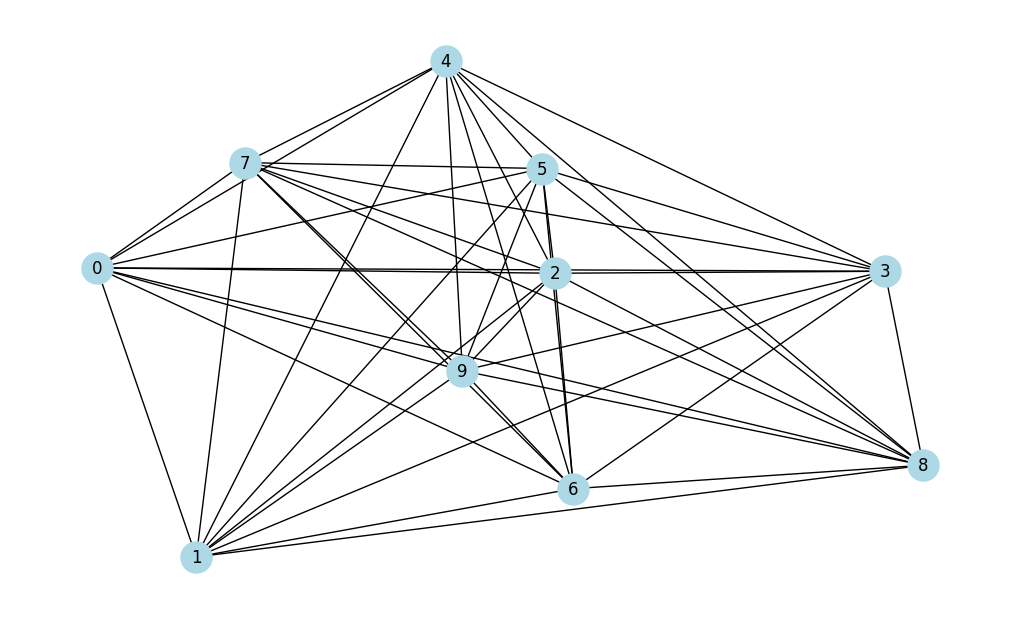

In [ ]:
G = gnp_random_connected_graph(10, 1, False, True)

## Subtask 1.1 (1 point)

### Kruskal's algorithm

#### nx implementation

In [ ]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

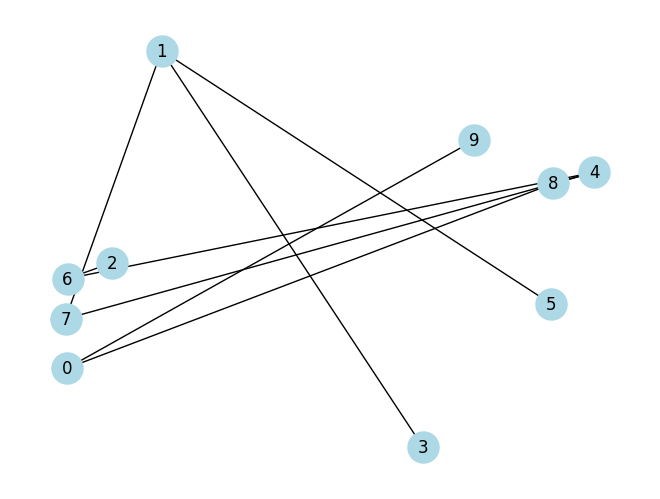

In [ ]:
nx.draw(mstk, node_color='lightblue',
        with_labels=True,
        node_size=500)

In [ ]:
mstk.edges(), len(mstk.edges())

(EdgeView([(0, 9), (0, 8), (1, 3), (1, 7), (1, 5), (2, 6), (4, 6), (4, 7), (4, 8)]),
 9)

#### Your implementation

In [ ]:
class DSU:
    def __init__(self, nodes):
        self.parent = {v: v for v in nodes}
        self.rank = {v: 0 for v in nodes}

    def find(self, v):
        if self.parent[v] != v:
            self.parent[v] = self.find(self.parent[v])
        return self.parent[v]

    def union(self, a, b):
        ra = self.find(a)
        rb = self.find(b)
        if ra == rb:
            return False

        if self.rank[ra] < self.rank[rb]:
            ra, rb = rb, ra

        self.parent[rb] = ra
        if self.rank[ra] == self.rank[rb]:
            self.rank[ra] += 1

        return True


def kruskal_algorithm(graph) -> list:
    """
    Docstring for kruskal_algorithm

    :param nodes: Description
    :type nodes: list
    :param edges: Description
    :type edges: list
    :return: Description
    :rtype: list
    """
    if graph.is_directed():
        raise ValueError("MST is defined for undirected graphs only")
    nodes = list(graph.nodes())
    unsorted_edges = list(graph.edges(data=True))

#     nodes = [1, 2, 3, 4, 5, 6, 7]
#     unsorted_edges = [(1, 2, {'weight': 1}), (2, 3, {'weight': 2}), (3, 7, {'weight': 9}), (7, 6, {'weight': 8}), (6, 5, {'weight': 5}), (5, 4, {'weight': 3})
# , (4, 1, {'weight': 3}), (1, 5, {'weight': 8}), (2, 5, {'weight': 2}), (3, 5, {'weight': 6})]
    sorted_edges = sorted(unsorted_edges, key = lambda x: x[2]['weight'])

    skeleton_tree = []
    cycle = DSU(nodes)
    # skeleton_tree = nx.Graph()
    # skeleton_tree.add_nodes_from(nodes)

    for u, v, w in sorted_edges:
        weight = w['weight']
        if cycle.union(u, v) is True:
            skeleton_tree.append((u, v, weight))

            if len(skeleton_tree) == len(nodes) - 1:
                break

    return skeleton_tree

#### Additional point (+0.5)

Use DSU (disjoint set union) in implementation of the algorithm

n=10, p=0.2 | my=0.000055s | nx=0.000143s
n=10, p=0.5 | my=0.000069s | nx=0.000174s
n=20, p=0.2 | my=0.000119s | nx=0.000344s
n=20, p=0.5 | my=0.000187s | nx=0.000399s
n=50, p=0.2 | my=0.000461s | nx=0.000951s
n=50, p=0.5 | my=0.000875s | nx=0.001887s
n=100, p=0.2 | my=0.001529s | nx=0.003326s
n=100, p=0.5 | my=0.003459s | nx=0.007484s
n=200, p=0.2 | my=0.007236s | nx=0.012446s
n=200, p=0.5 | my=0.019730s | nx=0.033965s
n=500, p=0.2 | my=0.048081s | nx=0.053236s
n=500, p=0.5 | my=0.077614s | nx=0.132753s


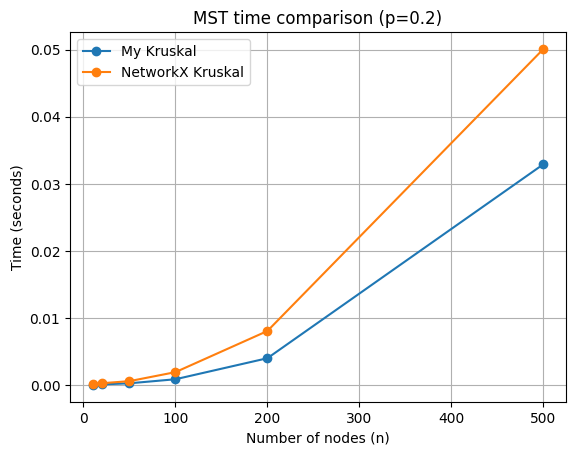

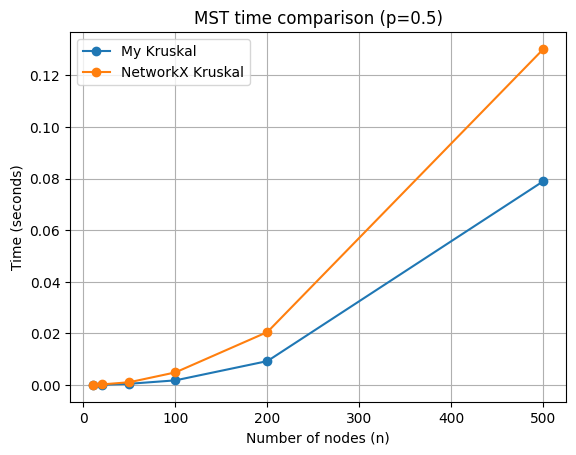

n=10, p=0.2 | edges_ok=True | weight_equal=True | my_w=-1 nx_w=-1
n=10, p=0.5 | edges_ok=True | weight_equal=True | my_w=-22 nx_w=-22
n=50, p=0.2 | edges_ok=True | weight_equal=True | my_w=-151 nx_w=-151
n=50, p=0.5 | edges_ok=True | weight_equal=True | my_w=-221 nx_w=-221
n=100, p=0.2 | edges_ok=True | weight_equal=True | my_w=-434 nx_w=-434
n=100, p=0.5 | edges_ok=True | weight_equal=True | my_w=-474 nx_w=-474
[(0, 9, -5), (1, 99, -5), (2, 10, -5), (2, 50, -5), (2, 69, -5), (3, 13, -5), (3, 20, -5), (3, 46, -5), (4, 13, -5), (4, 27, -5), (5, 72, -5), (6, 15, -5), (6, 71, -5), (7, 15, -5), (7, 41, -5), (8, 94, -5), (9, 67, -5), (9, 69, -5), (10, 30, -5), (11, 51, -5), (11, 52, -5), (11, 88, -5), (12, 73, -5), (12, 83, -5), (12, 96, -5), (13, 43, -5), (13, 96, -5), (16, 45, -5), (16, 60, -5), (18, 20, -5), (18, 24, -5), (18, 63, -5), (19, 52, -5), (19, 53, -5), (19, 84, -5), (19, 91, -5), (20, 40, -5), (21, 25, -5), (21, 41, -5), (22, 51, -5), (23, 24, -5), (24, 37, -5), (24, 54, -5), 

In [ ]:
def min_time(func, *args, repeats=3):
    best = float("inf")
    for _ in range(repeats):
        t0 = time.perf_counter()
        func(*args)
        t1 = time.perf_counter()
        best = min(best, t1 - t0)
    return best

sizes = [10, 20, 50, 100, 200, 500]
ps = [0.2, 0.5]
repeats = 3

for n in sizes:
    for p in ps:
        G = gnp_random_connected_graph(n, p, directed=False, draw=False)

        t_my = min_time(kruskal_algorithm, G, repeats=repeats)
        t_nx = min_time(lambda g: nx.minimum_spanning_tree(g, algorithm="kruskal"), G, repeats=repeats)

        print(f"n={n}, p={p:.1f} | my={t_my:.6f}s | nx={t_nx:.6f}s")
sizes = [10, 20, 50, 100, 200, 500]
ps = [0.2, 0.5]
repeats = 3

for p in ps:
    my_times = []
    nx_times = []

    for n in sizes:
        G = gnp_random_connected_graph(n, p, directed=False, draw=False)

        t_my = min_time(kruskal_algorithm, G, repeats=repeats)
        t_nx = min_time(lambda g: nx.minimum_spanning_tree(g, algorithm="kruskal"), G, repeats=repeats)

        my_times.append(t_my)
        nx_times.append(t_nx)

    plt.figure()
    plt.plot(sizes, my_times, marker="o", label="My Kruskal")
    plt.plot(sizes, nx_times, marker="o", label="NetworkX Kruskal")
    plt.xlabel("Number of nodes (n)")
    plt.ylabel("Time (seconds)")
    plt.title(f"MST time comparison (p={p})")
    plt.legend()
    plt.grid(True)
    plt.show()
def weight_my_list(edge_list):
    return sum(w for _, _, w in edge_list)

def weight_nx_graph(mst_graph):
    return sum(d["weight"] for _, _, d in mst_graph.edges(data=True))

for n in [10, 50, 100]:
    for p in [0.2, 0.5]:
        G = gnp_random_connected_graph(n, p, directed=False, draw=False)

        my_edges = kruskal_algorithm(G)  # твій список ребер (u,v,w)
        nx_mst = nx.minimum_spanning_tree(G, algorithm="kruskal")

        my_w = weight_my_list(my_edges)
        nx_w = weight_nx_graph(nx_mst)

        ok_edges = (len(my_edges) == n - 1)
        ok_weight = (my_w == nx_w)

        print(f"n={n}, p={p} | edges_ok={ok_edges} | weight_equal={ok_weight} | my_w={my_w} nx_w={nx_w}")
print(kruskal_algorithm(G))



Порівняння

З графіків видно, що реалізований нами алгоритм Краскала працює швидше на відносно невеликій кількості вершин

Загалом хоч наша реалізація працює швидше на такій кількості вершин, вона на більшій кількості або на густіших графах буде працювати гірше ніж NetworkX. Це видно навіть на графіках, бо різниця у затраченому часі між p=0.2 i p=0.5 у нас більша, а отже рано чи пізно NetworkX дожене нашу реалізацію. Проте з малими чи розрідженими графами наша реалізація впорається досить добре


### Prim's algorithm

#### nx implementation

In [ ]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

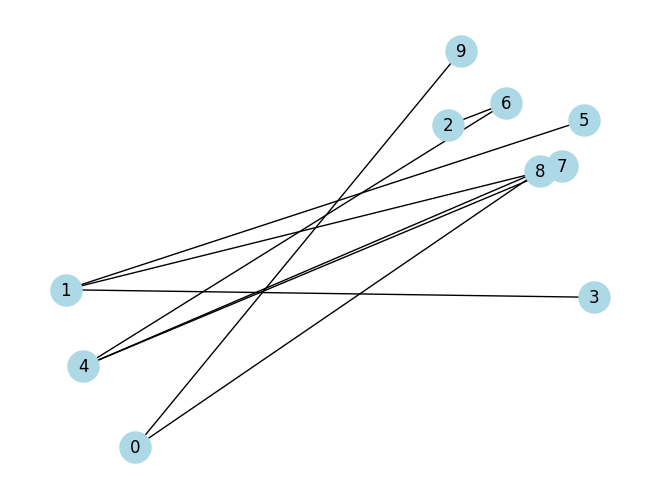

In [ ]:
nx.draw(mstp, node_color='lightblue',
        with_labels=True,
        node_size=500)

In [ ]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 9), (0, 8), (1, 7), (1, 3), (1, 5), (2, 6), (4, 8), (4, 6), (4, 7)]),
 9)

#### Your implementation

In [ ]:
# code here

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Subtask 1.2 (1 point)

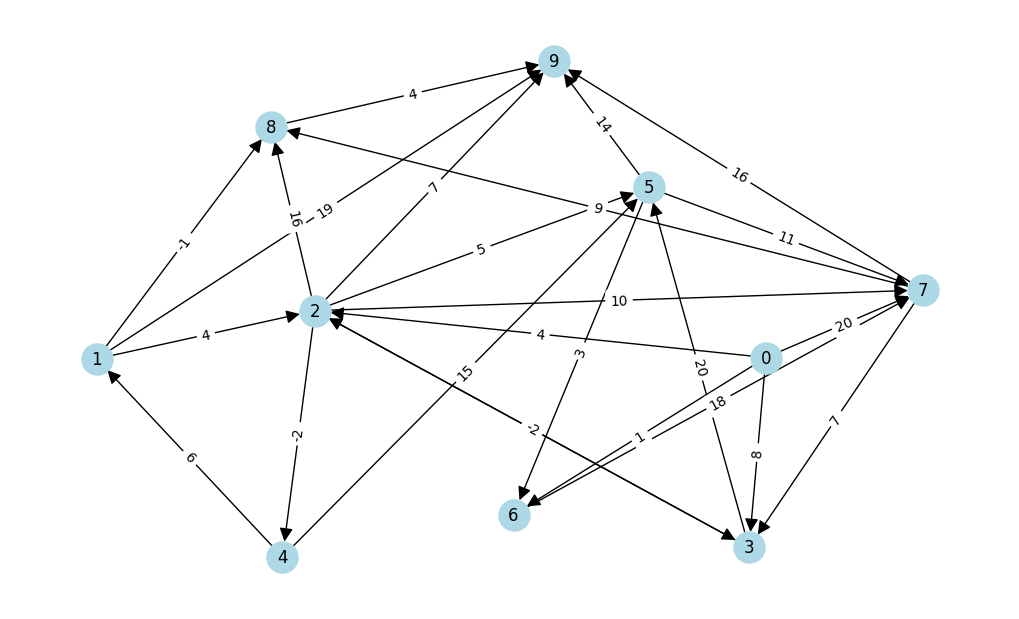

In [ ]:
G = gnp_random_connected_graph(10, 0.5, True, True)

### Bellman-Ford algorithm

#### nx implementation

In [ ]:
# pred is a dictionary of predecessors, dist is a dictionary of distances
try:
    pred, dist = bellman_ford_predecessor_and_distance(G, 0)
    for k, v in dist.items():
        print(f"Distance to {k}:", v)
except:
    print("Negative cycle detected")

Distance to 0: 0
Distance to 5: 0
Distance to 2: 20
Distance to 3: -3
Distance to 6: 2
Distance to 7: 1
Distance to 8: -3
Distance to 9: 4


#### Your implementation

In [ ]:
# code here

### Floyd-Warshall algorithm

#### nx implementation

In [ ]:
# pred is a dictionary of predecessors, dist is a dictionary of distances dictionaries
try:
    pred, dist = floyd_warshall_predecessor_and_distance(G)
    for k, v in dist.items():
        print(f"Distances with {k} source:", dict(v))
except:
    print("Negative cycle detected")

Distances with 0 source: {0: 0, 6: 1, 2: 4, 3: 8, 7: 14, 1: 8, 4: 2, 5: 9, 8: 7, 9: 11}
Distances with 1 source: {1: 0, 2: 4, 8: -1, 9: 3, 0: inf, 3: 11, 4: 2, 5: 9, 6: 12, 7: 14}
Distances with 2 source: {2: 0, 3: 7, 4: -2, 5: 5, 7: 10, 8: 3, 9: 7, 0: inf, 1: 4, 6: 8}
Distances with 3 source: {3: 0, 2: -2, 5: 3, 0: inf, 1: 2, 4: -4, 6: 6, 7: 8, 8: 1, 9: 5}
Distances with 4 source: {4: 0, 1: 6, 5: 15, 0: inf, 2: 10, 3: 17, 6: 18, 7: 20, 8: 5, 9: 9}
Distances with 5 source: {5: 0, 9: 14, 6: 3, 7: 11, 0: inf, 1: 20, 2: 16, 3: 18, 4: 14, 8: 19}
Distances with 6 source: {6: 0, 7: 18, 0: inf, 1: 27, 2: 23, 3: 25, 4: 21, 5: 28, 8: 26, 9: 30}
Distances with 7 source: {7: 0, 3: 7, 9: 12, 8: 8, 0: inf, 1: 9, 2: 5, 4: 3, 5: 10, 6: 13}
Distances with 8 source: {8: 0, 9: 4, 0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf, 6: inf, 7: inf}
Distances with 9 source: {9: 0, 0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf, 6: inf, 7: inf, 8: inf}


#### Your implementation

In [ ]:
def floyd_warshall(graph):
    """Floyd-Warshall algorithm"""
    nodes = list(graph.nodes)
    edges = list(graph.edges(data=True))

    matrix_w_0 = [[float('inf')] * len(nodes) for _ in range(len(nodes))]

    if graph.is_directed():
        for v1, v2, weight in edges:
            matrix_w_0[v1 - 1][v2 - 1] = weight['weight']
    elif not graph.is_directed():
        for v1, v2, weight in edges:
            matrix_w_0[v1 - 1][v2 - 1] = weight['weight']
            matrix_w_0[v2 - 1][v1 - 1] = weight['weight']

    for k in range(len(nodes)):
        for i in range(len(nodes)):
            matrix_w_0[i][i] = 0
            for j in range(len(nodes)):
                if matrix_w_0[i][j] > matrix_w_0[k][j] + matrix_w_0[i][k]:
                    matrix_w_0[i][j] = matrix_w_0[k][j] + matrix_w_0[i][k]

    for i in range(len(nodes)):
        if matrix_w_0[i][i] < 0:
            return "Є цикл від'ємної ваги."
    return matrix_w_0#cписк списків

Порівняння і граф

p=0.2, n=10 | my=0.000255s | nx=0.000469s
p=0.2, n=20 | my=0.004011s | nx=0.007990s
p=0.2, n=50 | my=0.029931s | nx=0.066699s
p=0.2, n=100 | my=0.184110s | nx=0.311061s
p=0.2, n=200 | my=1.509825s | nx=2.461279s
p=0.2, n=500 | my=30.470653s | nx=49.911977s


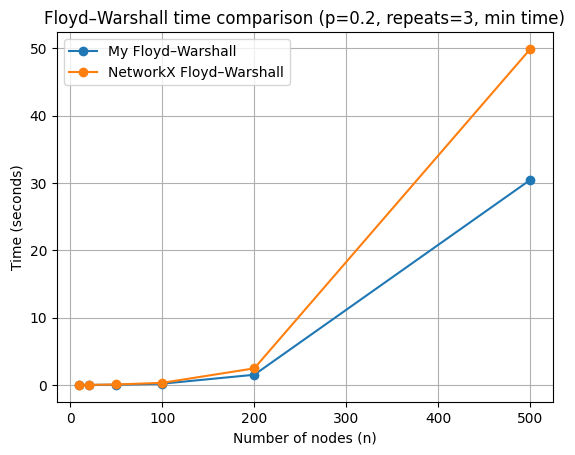

p=0.5, n=10 | my=0.000266s | nx=0.000313s
p=0.5, n=20 | my=0.001170s | nx=0.002232s
p=0.5, n=50 | my=0.021221s | nx=0.034363s
p=0.5, n=100 | my=0.173320s | nx=0.290046s
p=0.5, n=200 | my=1.591191s | nx=2.500692s
p=0.5, n=500 | my=30.861046s | nx=52.672383s


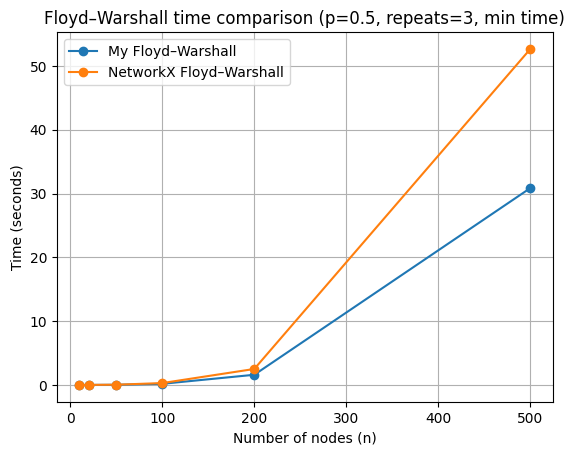

In [ ]:
def min_time(func, *args, repeats=3, **kwargs):
    best = float("inf")
    for _ in range(repeats):
        t0 = time.perf_counter()
        func(*args, **kwargs)
        t1 = time.perf_counter()
        best = min(best, t1 - t0)
    return best

sizes = [10, 20, 50, 100, 200, 500]
ps = [0.2, 0.5]   # кожне p = окремий експеримент/окремий графік
repeats = 3

for p in ps:
    my_times = []
    nx_times = []

    for n in sizes:
        G = gnp_random_connected_graph(n, p, directed=False, draw=False)

        # твоя реалізація
        t_my = min_time(floyd_warshall, G, repeats=repeats)

        # networkx: Floyd–Warshall (distance dict-of-dict)
        t_nx = min_time(nx.floyd_warshall, G, weight="weight", repeats=repeats)

        my_times.append(t_my)
        nx_times.append(t_nx)

        print(f"p={p:.1f}, n={n} | my={t_my:.6f}s | nx={t_nx:.6f}s")

    plt.figure()
    plt.plot(sizes, my_times, marker="o", label="My Floyd–Warshall")
    plt.plot(sizes, nx_times, marker="o", label="NetworkX Floyd–Warshall")
    plt.xlabel("Number of nodes (n)")
    plt.ylabel("Time (seconds)")
    plt.title(f"Floyd–Warshall time comparison (p={p}, repeats={repeats}, min time)")
    plt.grid(True)
    plt.legend()
    plt.show()

Порівняння


З графіків видно що наша реалізація алгоритму Флойла-Воршалла працює швидше, при чому значно швидше вже на 500 вершинах

Хоч наш алгоритм і показує кращий результат по часу, у деяких ситуаціях він гірший. Наприклад NetworkX реалізація ще дає можливість відтворити цей шлях, а наша лише повертає матрицю ваг. Також NetworkX набагато універсальніший через більшу кількість перевірок

## Useful explanations

### How to get list of edges for your algorithm


In [ ]:
edges = list(G.edges()) # by default G.edges are EdgesView class

In [ ]:
edges[:5]

[(0, 1), (0, 4), (1, 0), (1, 2), (1, 7)]

### To get edges with weights

In [ ]:
edges = list(G.edges(data=True))

In [ ]:
edges[:5]

[(0, 1, {'weight': 13}),
 (0, 4, {'weight': -3}),
 (1, 0, {'weight': 10}),
 (1, 2, {'weight': 20}),
 (1, 7, {'weight': 17})]

In [ ]:
nodes = list(G.nodes())
print(nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [ ]:
import time
from tqdm import tqdm

In [ ]:
NUM_OF_ITERATIONS = 1000
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):

    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)

    start = time.time()
    tree.minimum_spanning_tree(G, algorithm="prim")
    end = time.time()

    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [00:09<00:00, 100.44it/s]


0.0029261934757232664

# Task 2. Decision Tree Classifier

In [ ]:
# scikit-learn package
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## General idea


You are expected to write a quite simple, yet good core logic of decision tree classifier class. Additionaly, you need to test your results and write down a report on what you've done, which principles used and explain the general process.

Hopefully, you have already learned what is decision tree classifier and how it work. For better understanding, and in case if something is still unclear for you, here are some useful links on basics of DTC:
- https://www.youtube.com/watch?v=ZVR2Way4nwQ
- https://towardsdatascience.com/decision-tree-classifier-explained-a-visual-guide-with-code-examples-for-beginners-7c863f06a71e
- https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial
- https://medium.com/data-science/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575

Also, for those interested to learn more about machine learning and particulary Desicion Trees - here is a great course on Coursera (you may be interested in the whole course or just this particular week):
- https://www.coursera.org/learn/advanced-learning-algorithms/home/week/4

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Dataset

You can use Iris dataset for this task. It is a very popular dataset for machine learning and data science. It contains 150 samples of 3 different species of Iris flowers (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
Read more on this: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
https://en.wikipedia.org/wiki/Iris_flower_data_set

However, using more interesting and intricate datasets is much appreciated. You can use any dataset you want, but it should be a classification one. For example you can use breast cancer or wine datasets, which are also available in sklearn.datasets. Or you can use any other dataset you find interesting.

P.S. In case you are not sure if your dataset is suitable, feel free to ask assistants :).

In [ ]:
# Load dataset
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.data.shape

(150, 4)

This means that we have 150 entries (samples, infos about a flower). The columns being: Sepal Length, Sepal Width, Petal Length and Petal Width(features). Let's look at first two entries:

In [ ]:
iris.data[0:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

### To undestand data little bit better, let's plot some features

Text(0, 0.5, 'Sepal width')

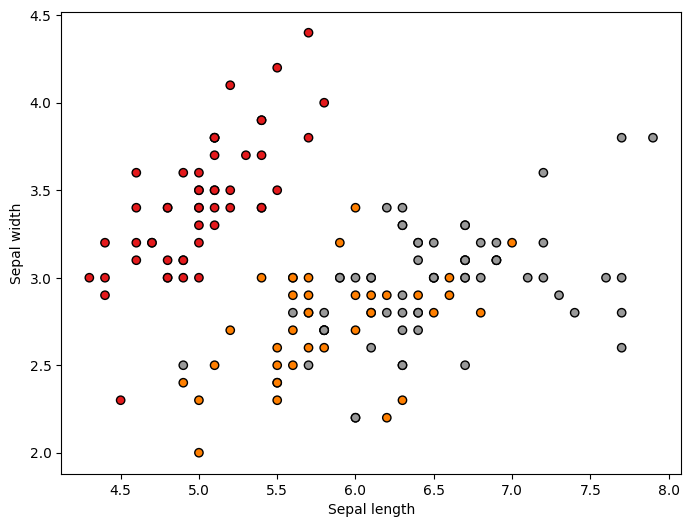

In [ ]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

From this we can clearly see, that even basing on those two parameters, we can clearly divide (classify) out data into several groups. For this, we will use decision tree classifier: https://scikit-learn.org/stable/modules/tree.html#tree


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Example of usage

**Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression**. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [ ]:
clf = DecisionTreeClassifier()

X, y = iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

### Train / test split

We train our model using training dataset and evaluate its performance basing on the test dataset. Reason to use two separate datasets is that our model learns its parameters from data, thus test set allows us to check its possibilities on completely new data.

In [ ]:
X, X_test, y, y_test = train_test_split(X, y, test_size= 0.20)
X_test.shape, y_test.shape

((30, 4), (30,))

### Model learning

It learns its parameters (where it should split data and for what threshold value) basing on the training dataset. It is done by minimizing some cost function (e.g. Gini impurity or entropy).

In [ ]:
clf = clf.fit(X, y)

### Visualization of produced tree

You do not need to understand this piece of code :)

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

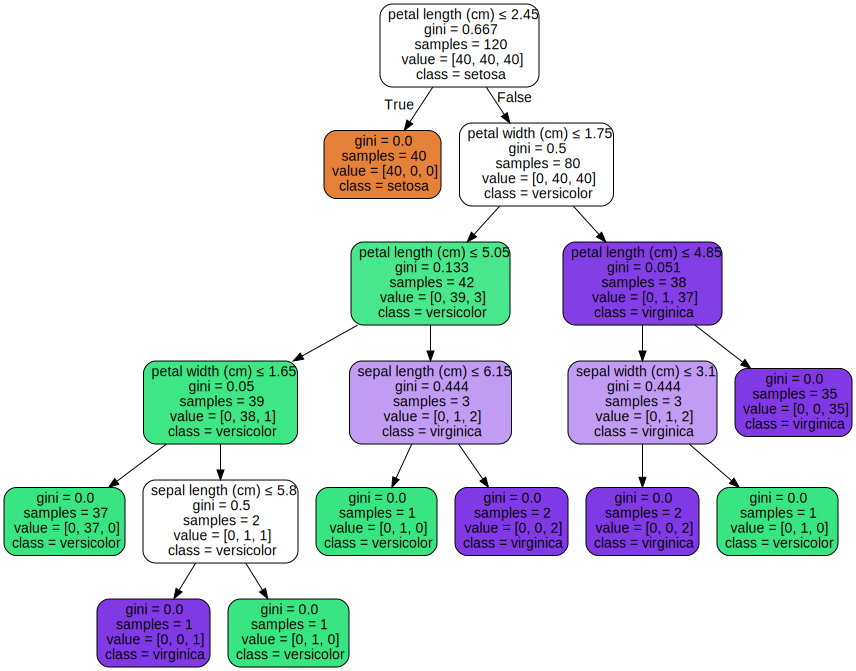

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Prediction step

Now we can use our model to predict which type has a flower, basing on its parameters.

This is conducted basically via traversing the tree that you can see above.

In [ ]:
predictions = clf.predict(X_test)

### We can also measure the accuracy of our model

In [ ]:
sum(predictions == y_test) / len(y_test)

np.float64(0.9333333333333333)

To get clearer intuition about predicion, let's look at those X, that should be labeled to some flower

In [ ]:
y_test

array([1, 0, 1, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 0, 2, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 2, 2])


Here you can traverse the tree above by yourself and make sure that prediction works

In [ ]:
X_test[1]

array([4.4, 3. , 1.3, 0.2])

In [ ]:
clf.predict([X_test[1]])

array([0])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Decision tree classifier (2 point)

###  Gini impurity


Decision trees use the concept of Gini impurity to describe how “pure” a node is. A node is pure (G = 0) if all its samples belong to the same class, while a node with many samples from many different classes will have a Gini closer to 1.

$G = 1 - \sum_{k=1}^{n}p_{k}^2$

For example, if a node contains five samples, with two belonging to the first class (first flower), two of class 2, one of class 3 and none of class 4, then

$G = 1 - (\frac{2}{5})^2 - (\frac{2}{5})^2 - (\frac{1}{5})^2 = 0.64$


### Your implementation

> We recommend using additional functions in `DecisionTreeClassifier` class, to make the implementation process easier.

In [ ]:

class Node:
    def __init__(self, X: npt.NDArray, y: npt.NDArray):
        """
        :param X: numpy array of form [[feature1,feature2, ... featureN], ...] (i.e. [[1.5, 5.4, 3.2, 9.8] , ...] for case with iris d.s.)
        :param y: numpy array of from [class1, class2, ...] (i.e. [0,1,1,2,1,0,...] for case with iris d.s.)
        """

        self.X = X
        self.y = y
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

In [ ]:
class DecisionTreeClasifier:
    def __init__(self, min_samples_split=2, max_depth=2):

        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        X, y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape

        if n_samples >= self.min_samples_split and curr_depth <= self.max_depth:
            best_split = self.best_split(dataset, n_features)

            if best_split["info_gain"] > 0:
                left_node = self.build_tree(best_split["left_dataset"], curr_depth + 1)
                right_node = self.build_tree(best_split["right_dataset"], curr_depth + 1)

                return Node(best_split["feature_idx"], best_split["threshold"], best_split["info_gain"], left_node, right_node)

        counts = Counter(y)
        classes = np.unique(y)
        K = len(classes)
        N = len(y)

        probs = {c: (counts.get(c, 0) + 1) / (N + K) for c in classes}
        leaf_value = max(probs, key=probs.get)
        return Node(value=leaf_value)


    def best_split(self, dataset, n_features):
        best_split = {'feature_idx': None, 'threshold': None, 'info_gain': -1, 'left_dataset': None, 'right_dataset': None}

        for feature_idx in range(n_features):
            feature_values = dataset[:, feature_idx]
            thresholds = np.unique(feature_values)

            for threshold in thresholds:
                left_dataset, right_dataset = self.split(dataset, feature_idx, threshold)

                if len(left_dataset) and len(right_dataset):
                    parent_y, left_y, right_y = dataset[:, -1], left_dataset[:, -1], right_dataset[:, -1]

                    info_gain = self.information_gain(parent_y, left_y, right_y)

                    if info_gain > best_split['info_gain']:
                        best_split['feature_idx'] = feature_idx
                        best_split['threshold'] = threshold
                        best_split['info_gain'] = info_gain
                        best_split['left_dataset'] = left_dataset
                        best_split['right_dataset'] = right_dataset

        return best_split

    def split(self, dataset, feature_idx, threshold):
        left_dataset = np.array([row for row in dataset if row[feature_idx] <= threshold])
        right_dataset = np.array([row for row in dataset if row[feature_idx] > threshold])

        return left_dataset, right_dataset

    def information_gain(self, parent_y, left_y, right_y):
        left_weight = len(left_y) / len(parent_y)
        right_weight = len(right_y) / len(parent_y)

        information_gain = self.gini_index(parent_y) - (left_weight * self.gini_index(left_y) + right_weight * self.gini_index(right_y))
        return information_gain

    def gini_index(self, y):
        gini = 1
        class_labels = np.unique(y)

        for class_label in class_labels:
            p = len(y[y == class_label]) / len(y)
            gini += -p ** 2

        return gini

    def fit(self, X, y):
        dataset = np.concatenate([X, y.reshape(-1, 1)], axis=1)
        self.root = self.build_tree(dataset)


    def predict(self, X):
        predictions = [self.predict_class(row, self.root) for row in X]
        return predictions


    def predict_class(self, row, node):
        if node.value != None:
            return node.value

        feature_val = row[node.feature_idx]
        if feature_val <= node.threshold:
            return self.predict_class(row, node.left)
        else:
            return self.predict_class(row, node.right)


In [ ]:

def evaluate(X_test: list[list], y_test: list, dt) -> float:
    """
    Returns accuracy of the decision tree (ratio of right guesses to the number of samples)
    Rounded to 2 decimal places
    """
    predictions = np.array(model.predict(X_test))
    accuracy = np.mean(predictions == y_test) * 100  # у відсотках
    return round(accuracy, 2)

Підсумок

Реалізовано рекурсивне дерево рішень з критерієм Gini. Для листових вузлів використано сгладжений підрахунок ймовірностей класів. Модель навчалась на 80% даних і тестувалась на 20%. Точність на тесті склала ~93–95%. Реалізація придатна для невеликих наборів даних, але не оптимізована для великих датасетів.

#### Additional point (+0.5)

Use Laplace smoothing, explain what is the point of using it

В нас є